# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read Data

In [2]:
data=pd.read_excel("ANZ synthesised transaction dataset.xlsx")
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


This Dataset Contains 3 months transactions of 100 potential customers.It contains purchases, recurring transactions, and salary transactions.Let's see what the columns are

In [3]:
pd.DataFrame({"columns":data.columns})

,columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


In [4]:
print("The Dataset has total ", data.shape[0], "enteries along", data.shape[1], "columns")

The Dataset has total  12043 enteries along 23 columns


# 2.Basic Checks

### 2.1 Unique Customers, Unique Transactions, 3 Months of Data

Before we check each column individually let's first check the following:

1.100 Unique Customers


2.Each row corresponds to unique transaction ID(transaction_id)


3.3 months data(date)

In [5]:
print("Number of unique Customer ID's = ",data.customer_id.nunique())

Number of unique Customer ID's =  100


We have indeed 100 unique Customers

In [6]:
print("Number of rows in the dataset",len(data))
print("Number of Unique Transaction ID",data.transaction_id.nunique())

Number of rows in the dataset 12043
Number of Unique Transaction ID 12043


Number of Unique Transaction Id equals the number of rows in the dataset which means that every row corresponds to unique Transaction Id.

In [7]:
data.date.describe()

<ipython-input-7-2cb626a5e644>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

We do have 3 months of data indeed starting from 1/08/2018 to 31/10/2018 .There are total 91 unique days in the dataset which means we have one missing day.Lets check which date is missing

In [8]:
pd.date_range(start="2018-08-01",end="2018-10-31").difference(data.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

Missing Date is 16/08/2018

### 2.2 Non-null Count and data types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

### 2.3 Missing Values

In [10]:
missing=data.isnull().sum()
missing=missing[missing>0]
missing_percentage=round(missing/len(data),3)*100
pd.DataFrame({"Number of Missing Values":missing,"Percentage":missing_percentage}).sort_values(by="Percentage",ascending=False)

,Number of Missing Values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


bpay_biller_code and merchant_code both theses have significant amount of missing values 

### 2.4 Descrpitive Statistics of Numerical Variables 

In [11]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


The describe function is a good way to observe any anomalies in the numerical columns for example, we can check if the age and amount columns contain any negative values, or if a customer has an age of 150 etc. Here, I do not see any anomalies.

It also provides an overview of some basic statistics for the amount column. However, we do not know the breakdown of these transaction amounts for example, what sort of transactions are they, who made them etc. We will explore this as we proceed with our further analysis.

We can see see a huge spread between the maximum and minimum amount in the balance and amount columns. We will look into this further.

# 3.Exploratory Data Analysis

### 3.1 Categorical Variables

Here is a list of columns that serve as just identifiers.

1. bpay_biller_code
2. account
3. merchant_id
4. merchant_code
5. first_name
6. transaction_id
7. customer_id

#### 3.1.1 Status

In [12]:
data.status.value_counts(dropna=False)

authorized    7717
posted        4326
Name: status, dtype: int64

Status of of the individual transactions: authorised means transaction has already been approved, posted means still in the process.

#### 3.1.2 Card Present Flag

In [13]:
data.card_present_flag.value_counts(dropna=False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

A card-not-present (CNP) transaction occurs when neither the cardholder nor the credit card is physically present at the time of the transaction. It’s most common for orders that happen remotely — over the phone or by fax, internet, or mail.

#### 3.1.3 Currency Of Transaction

In [14]:
data.currency.value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

All transactions are made in AUD .This column would have been much informative if the transactions were done in other currencies too.

#### 3.1.4 Longitude and Latitude

In [15]:
data.long_lat.head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

Here are different coordinates which tells the location from where these transactions were made.

#### 3.1.5 Transaction Description(Types of transaction)

In [16]:
data.txn_description.value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

Let's plot these to have a better picture of different types of transaction.

C:\Users\AMIT MAURYA\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Transactions by Category')

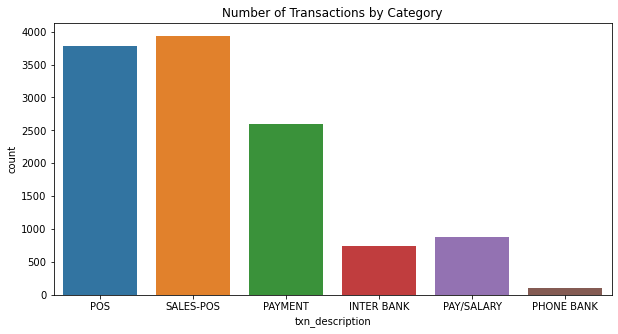

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data.txn_description)
plt.title("Number of Transactions by Category")

These are the descriptions for each transaction. Transactions mostly consist of sales payment.

In [18]:
data[["txn_description","amount"]].groupby("txn_description",as_index=False).mean().sort_values(by="amount",ascending=False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average transaction volume by category')

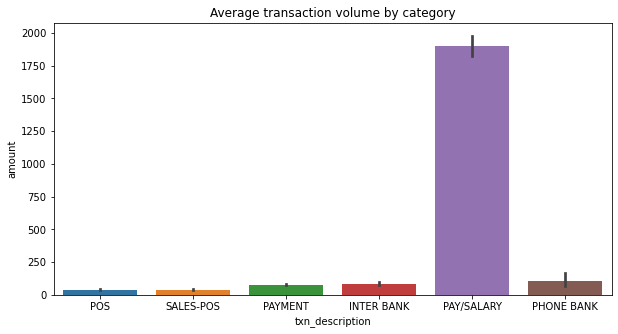

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x="txn_description",y="amount",data=data)
plt.title("Average transaction volume by category")

Pay Salary has the largest average transaction volume which seems logical. 

#### 3.1.6 Gender

In [20]:
data.gender.value_counts(dropna=False)

M    6285
F    5758
Name: gender, dtype: int64

C:\Users\AMIT MAURYA\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Transactions By Gender')

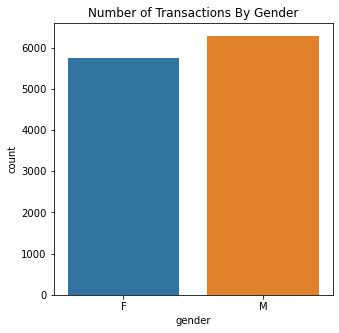

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(data.gender)
plt.title("Number of Transactions By Gender")

There are more transactions done by male customers than done by female customers.

In [22]:
data[["gender","amount"]].groupby("gender",as_index=False).mean().sort_values(by="amount",ascending=False)

,gender,amount
1,M,205.721809
0,F,168.517303


Text(0.5, 1.0, 'Average transaction volume by gender')

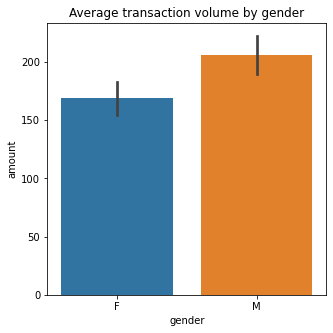

In [23]:
plt.figure(figsize=(5,5))
sns.barplot(x="gender",y="amount",data=data)
plt.title("Average transaction volume by gender")

Male has a higher average transaction volume.

#### 3.1.7 Extraction

In [24]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

This appears to be timestamp at which transactions were done.We can cross check it with date column.

In [25]:
data[["date","extraction"]].head()

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000


Since we already have an existing date column, we can potentially extract only the time component out of the extraction column.

#### 3.1.8 Merchant's longitude and latitude

In [26]:
data.merchant_long_lat.head()

0    153.38 -27.99
1    151.21 -33.87
2    151.21 -33.87
3    153.05 -26.68
4    153.44 -28.06
Name: merchant_long_lat, dtype: object

These are coordinates of merchants location.

#### 3.1.9 Movement (debit / credit)

In [27]:
data.movement.value_counts(dropna=False)

debit     11160
credit      883
Name: movement, dtype: int64

C:\Users\AMIT MAURYA\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Transactions By Movement')

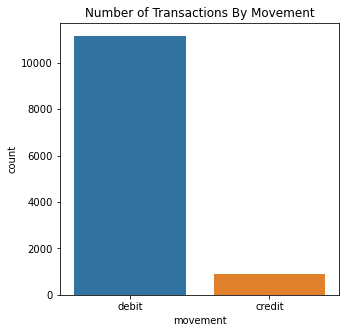

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(data.movement)
plt.title("Number of Transactions By Movement")

Most of the transactions were overwhemingly debit transactions.

Text(0.5, 1.0, 'Average transaction volume by movement')

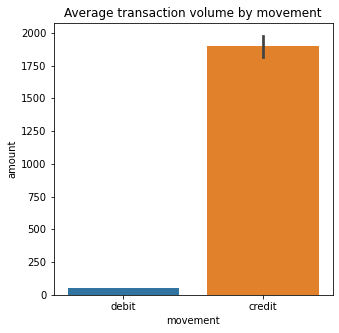

In [29]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "movement", y = "amount", data = data)
plt.title("Average transaction volume by movement")

Average transaction amount by credit transactions were higher than debit transactions.

### 3.2 Numerical Variables

#### 3.2.1 Balance

C:\Users\AMIT MAURYA\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Balance Distribution')

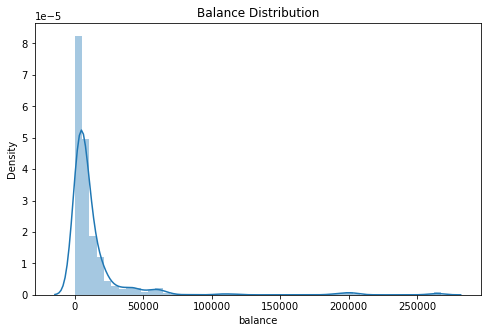

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(data.balance)
plt.title("Balance Distribution")

C:\Users\AMIT MAURYA\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

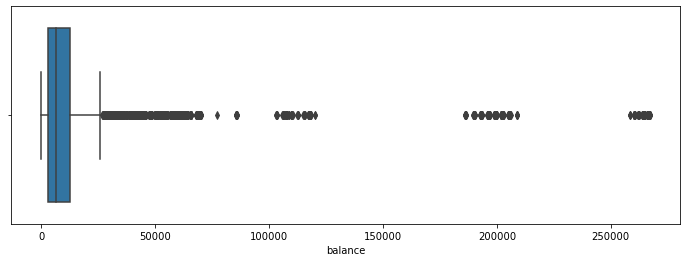

In [31]:
plt.figure(figsize=(12,4))
sns.boxplot(data.balance)

Distribution of the balance feature has a long tail.

#### 3.2.2 Age

C:\Users\AMIT MAURYA\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

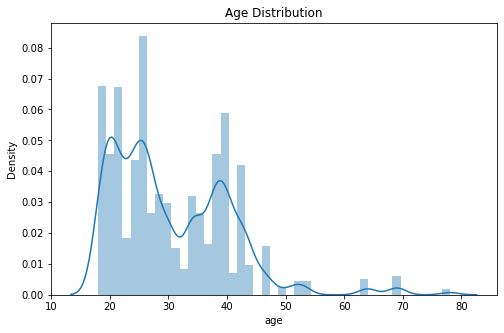

In [32]:
plt.figure(figsize=(8,5))
sns.distplot(data.age)
plt.title("Age Distribution")

Majority of the customers belong in the 20-30 age bracket.

#### 3.2.3 Transaction Amount

C:\Users\AMIT MAURYA\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount Distribution')

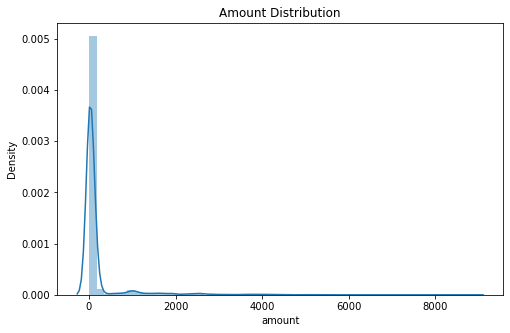

In [33]:
plt.figure(figsize=(8,5))
sns.distplot(data.amount)
plt.title("Amount Distribution")

### 4.Feature Engineering

In this section, we are going to focus on dropping unwanted columns, deal with missing values and finally create some additional features that will make our data analysis more detailed and robust.

#### 4.1 Drop Unwanted Columns

Drop currency and country columns as they do not provide any aditional information.

In [34]:
print("Before: ", data.shape)
data = data.drop(["currency", "country"],axis=1)
print("After: ", data.shape)

Before:  (12043, 23)
After:  (12043, 21)


#### 4.2 Deal with missing values

In [35]:
pd.DataFrame({"Number of Missing Values":missing,"Percentage":missing_percentage}).sort_values(by="Percentage",ascending=False)

,Number of Missing Values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


Let's investigate if there is a reason behind these missing values.

Recall that not all transactions are purchases-related, could this imply the missing values in the merchant columns?

In [36]:
nonSales=data.loc[((data.txn_description!="SALES-POS") | (data.txn_description != "POS")), :]
nonSales.isnull().sum().sort_values(ascending=False)

merchant_code        11160
bpay_biller_code     11158
merchant_suburb       4326
merchant_long_lat     4326
merchant_id           4326
card_present_flag     4326
merchant_state        4326
status                   0
customer_id              0
transaction_id           0
amount                   0
extraction               0
date                     0
age                      0
gender                   0
balance                  0
first_name               0
txn_description          0
long_lat                 0
account                  0
movement                 0
dtype: int64

As expected, missing values in the following columns all originate from non-purchases transactions:

1. card_present_flag
2. merchant_state
3. merchant_suburb
4. merchant_id
5. merchant_long_lat
 
We will proceed to fill these missing values with n/a.

In [37]:
cols=["card_present_flag","merchant_state","merchant_suburb","merchant_id","merchant_long_lat"]
for col in cols:
    data[col].fillna("n/a",inplace=True)

In [38]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False)

merchant_code       11160
bpay_biller_code    11158
dtype: int64

Both merchant_code and bpay_biller_code are severely missing, around 93%. Therefore, we will drop those 2 columns from the dataframe.

In [39]:
data=data.drop(["merchant_code","bpay_biller_code"],axis=1)
data.isnull().sum().max()

0

Now we don't have any missing data.

#### 4.3 Create features for month, dayofweek and hour

In [40]:
daily_amount=pd.DataFrame(data.groupby("date").amount.sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Transaction volume')

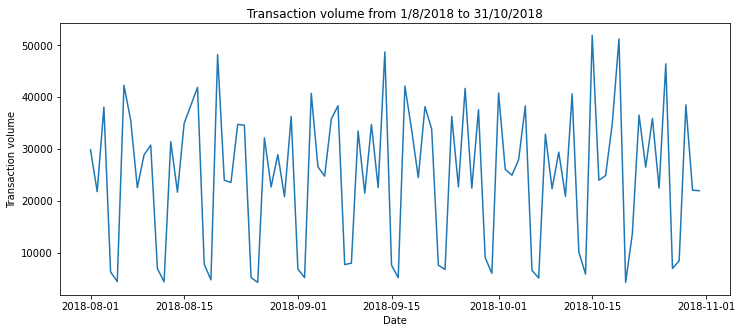

In [41]:
plt.figure(figsize=(12,5))
plt.plot(daily_amount.index, daily_amount.amount)
plt.title("Transaction volume from 1/8/2018 to 31/10/2018")
plt.xlabel("Date")
plt.ylabel("Transaction volume")

There appears to be a cyclical pattern in transaction volume over the 3 month period. My hypothesis for this occurence is:

- Salaries are paid out only on certain days of the week
- People tend to spend more during the weekends (shopping, going out with friends etc)
 
 Therefore, to motivate this analysis, we will create 3 new features from both the date and extraction columns:

- month
- dayofweek
- hour

In [42]:
data["month"]=pd.DatetimeIndex(data.date).month
data["day of week"]=pd.DatetimeIndex(data.date).dayofweek
data[['date','month','day of week']].head()

,date,month,day of week
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


Apart from month and day of week we can also extract hour from the extraction column.First we will split the extraction column such that it only contains time. Then i'll have a separate column for hour which contains hour at which transaction was done.

In [43]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [44]:
data["extraction"] = [timestamp.split("T")[1].split(".")[0] for timestamp in data.extraction]
data.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [45]:
data["hour"]=[time.split(":")[0] for time in data.extraction]
data[["extraction","hour"]].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


In [46]:

print("Before: ", data.hour.dtype)
data["hour"] = pd.to_numeric(data.hour)
print("After: ", data.hour.dtype)

Before:  object
After:  int64


### 5.Insights from our new DataFrame

Now that our dataframe is in a much better shape and we have new features to work with, let's now do a deep dive and see if we can gather any interesting insights about customers' transactional behaviour.

In [47]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,day of week,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,1
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,1
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,1
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,1
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,1


#### 5.1 Purchase amount and Overall amount

In [48]:
purchases_amount=data.loc[(data.txn_description == "POS") | (data.txn_description == "SALES-POS"), "amount"]
purchases_amount.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

C:\Users\AMIT MAURYA\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase transaction amount')

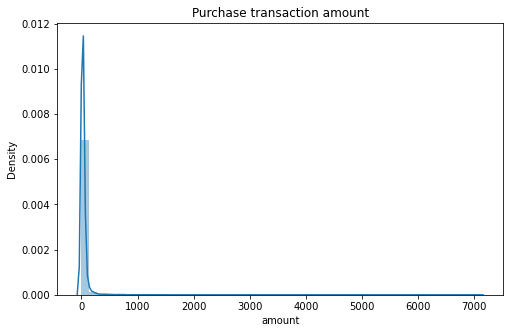

In [49]:
plt.figure(figsize = (8, 5))
sns.distplot(purchases_amount)
plt.title("Purchase transaction amount")

In [50]:
purchases_amount.describe()

count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

C:\Users\AMIT MAURYA\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall transaction amount')

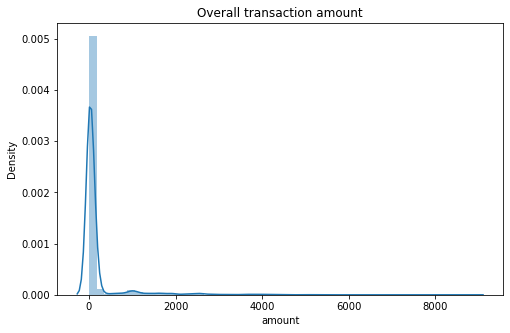

In [51]:
plt.figure(figsize = (8, 5))
sns.distplot(data.amount)
plt.title("Overall transaction amount")

In [52]:
data.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

Variance in overall transaction amount is much higher than purchases transaction amount due to the inclusion of salary payments.

#### 5.2 Transaction volume per customer

In [53]:
customer_monthly_volume = pd.DataFrame(data.groupby("customer_id").amount.sum() / 3) 
customer_monthly_volume.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


C:\Users\AMIT MAURYA\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Customers' monthly transaction volume")

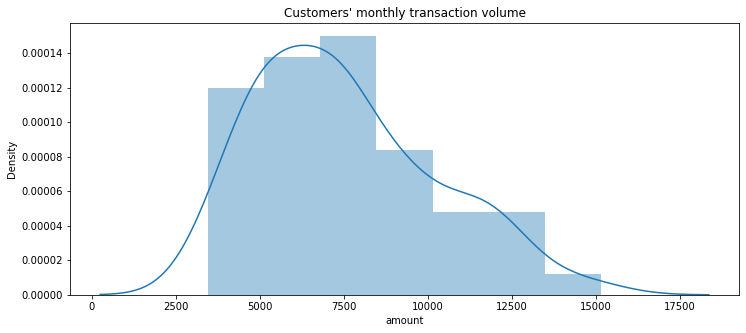

In [54]:
plt.figure(figsize = (12, 5))
sns.distplot(customer_monthly_volume.amount)
plt.title("Customers' monthly transaction volume")

#### 5.3 Transaction volume over time

Text(0.5, 1.0, 'Average transaction volume by month')

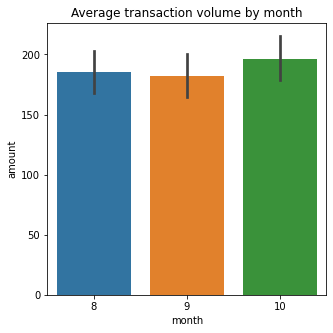

In [55]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "month", y = "amount", data = data)
plt.title("Average transaction volume by month")

In [56]:
average_daily_volume = pd.DataFrame(data.groupby("day of week").amount.mean())
average_daily_volume.head()

,amount
day of week,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0.5, 0, 'Day of week')

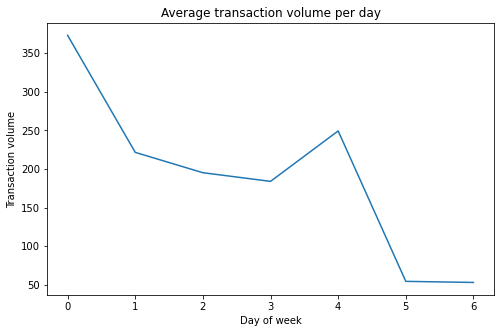

In [57]:
plt.figure(figsize=(8,5))
plt.plot(average_daily_volume.index, average_daily_volume.amount)
plt.title("Average transaction volume per day")
plt.ylabel("Transaction volume")
plt.xlabel("Day of week")

Friday and Saturday have the lowest average transaction volume.

Let's see a breakdown of these transactions by types of transactions.

To simplify the categories, I will group all transactions into 3 categories:

- Salary
- Purchase
- Others

In [58]:
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [59]:
data.loc[data.txn_description == "PAY/SALARY", "category"] = "Salary"
data.loc[(data.txn_description == "SALES-POS") | (data.txn_description == "POS"), "category"] = "Purchase"
data.category.fillna("Others", inplace = True)
data[["txn_description", "category"]].head(10)

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


Text(0.5, 0, 'Day of week')

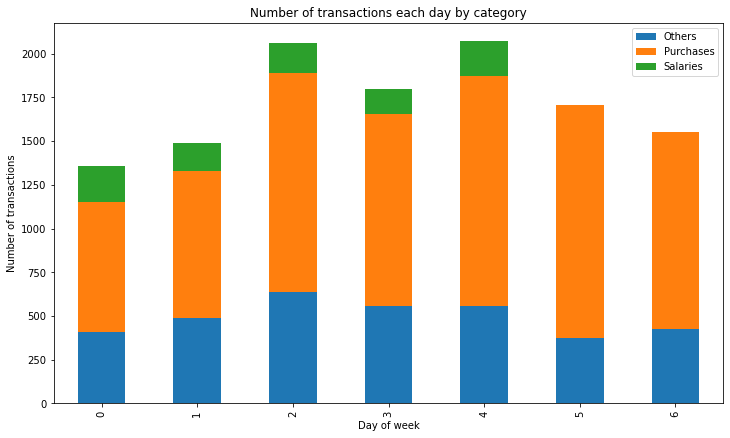

In [60]:
stacked_barplot = pd.DataFrame(data.groupby(["day of week", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12, 7))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Day of week")

No salaries were paid on Friday and Saturday, therefore lower average transaction volume on those days.

Also, it does not seem to appear that people spend more on purchases over the weekends.

In [61]:
average_hourly_volume = pd.DataFrame(data.groupby("hour").amount.mean())
average_hourly_volume.head()

,amount
hour,
0,28.274907
1,48.716402
2,75.269764
3,84.725918
4,61.301845


Text(0.5, 0, 'Hour')

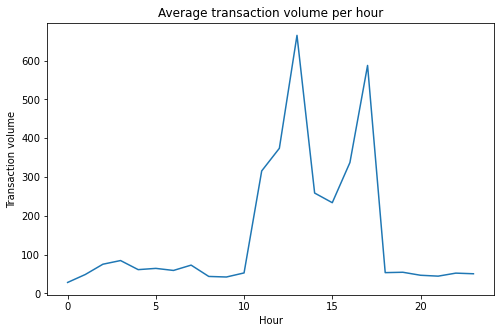

In [62]:
plt.figure(figsize = (8, 5))
plt.plot(average_hourly_volume.index, average_hourly_volume.amount)
plt.title("Average transaction volume per hour")
plt.ylabel("Transaction volume")
plt.xlabel("Hour")

Highest transaction volumes happen during the midday and late afternoon. Let's see a breakdown of these transactions by categories.

Text(0.5, 0, 'Hour')

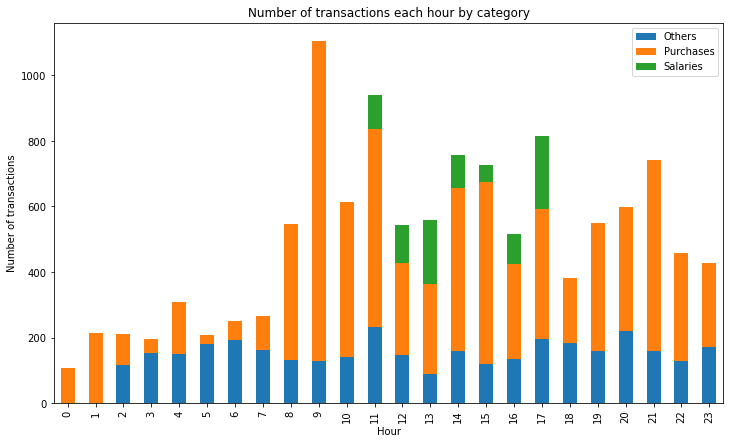

In [63]:
stacked_barplot = pd.DataFrame(data.groupby(["hour", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12, 7))
plt.title("Number of transactions each hour by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Hour")

### Save Data

Task 1 is done! Save data for task 2

In [64]:
data.to_pickle("data.pk1")